In [7]:
import numpy as np

In [1]:
from pgmagick import Image

img = Image('T19XDJ_20170719T184921_TCI.jp2') # Input Image
img.write('test.jpeg')

ImportError: /usr/lib/x86_64-linux-gnu/libboost_python-py27.so.1.58.0: undefined symbol: PyClass_Type

In [10]:
# Import jp2 images, try downsampling by striding through images

import glymur

jp2 = glymur.Jp2k('T19XDJ_20170719T184921_TCI.jp2')

In [11]:
fullres = jp2[:]
fullres.shape

KeyboardInterrupt: 

In [20]:
thumbnail = jp2[::16, ::16]
thumbnail.shape

(687, 687, 3)

In [6]:
# Count white pixels

def isWhite(x):
    if x[0] > 230 and x[1] > 230 and x[2] > 230:
        return 1
    return 0

filter = np.apply_along_axis(isWhite, 2, pix)
print(filter.sum())
print(filter.shape)


16683
(687, 687)


In [31]:
def isWhite(x):
    if x[0] > 230 and x[1] > 230 and x[2] > 230:
        return 1
    return 0

In [27]:
frac = filter.sum()/filter.size
print(frac)

0.3658969127209626


In [6]:
# Save downsampled image?
img = Image.fromarray(thumbnail, 'RGB')
img.save('my.png')
img.save('my.jpg', "JPEG")
img.show()

NameError: name 'Image' is not defined

In [3]:
import os
counter = 0
for filename in os.listdir('./notcloudy2'):
    counter +=1
    if(counter <20):
        print(filename)

image10800.jpg
image8612.jpg
image115.jpg
image7597.jpg
image4114.jpg
image3510.jpg
image3675.jpg
image1082.jpg
image9302.jpg
image1571.jpg
image10762.jpg
image7779.jpg
image10751.jpg
image10378.jpg
image6320.jpg
image2093.jpg
image10740.jpg
image1881.jpg
image4611.jpg


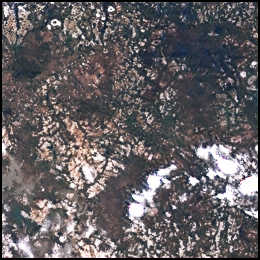

In [41]:
from IPython.display import Image as Img
Img(filename="./PyTorch-CycleGAN/output/A/0001.png")

(260, 260, 3)


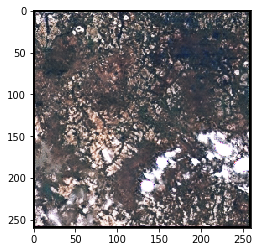

In [42]:
from PIL import Image
pic = Image.open("./PyTorch-CycleGAN/output/A/0001.png")
pix = np.array(pic)
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(np.asarray(pic))
print(pix.shape)

In [12]:
from PIL import Image
pic = Image.open("./notcloudy2/image4611.jpg")
pix = np.array(pic)

In [6]:
print(pix.shape)

(687, 687, 3)


In [10]:
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from PIL import Image

In [38]:
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from PIL import Image
# Experiment with pytorch rescaling
resize = transforms.Resize(int(256*1.12), Image.BICUBIC)
crop = transforms.RandomCrop(256)
pad = transforms.Pad(2)

pic = resize(pic)
pic = crop(pic)
pic = pad(pic)

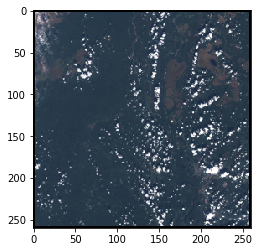

In [39]:
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(np.asarray(pic))

In [40]:
np.asarray(pic).shape

(260, 260, 3)

In [24]:
import numpy as np
from PIL import Image
def compare(file1, file2):
  im = [None, None] # to hold two arrays
  for i, f in enumerate([file1, file2]):
    im[i] = (np.array(Image.open(f))
                 ).astype(np.int)   # convert from unsigned bytes to signed int using numpy
  return np.abs(im[0] - im[1]).mean() 

In [27]:
# Now evaluate average distance in pairs. These are working on the pairs generated from the cycleGAN

mainPath = "./pytorch-CycleGAN-and-pix2pix/results/cloudy2notcloudy_pix2pix/test_latest/images/"
sumDiffs = 0
for i in range(1366, 1516):
    name1 = mainPath + str(i).zfill(4) + "_real_B.png"
    name2 = mainPath + str(i).zfill(4) + "_fake_B.png"
    sumDiffs += compare(name1, name2)
    
print(sumDiffs)
print(sumDiffs/150.)

2840.5609690348306
18.93707312689887


In [28]:
# Baseline--distance between cloudy image and not cloudy image

mainPath = "./pytorch-CycleGAN-and-pix2pix/results/cloudy2notcloudy_pix2pix/test_latest/images/"
sumDiffs = 0
for i in range(1, 801):
    name1 = mainPath + str(i).zfill(4) + "_real_B.png"
    name2 = mainPath + str(i).zfill(4) + "_fake_B.png"
    sumDiffs += compare(name1, name2)
    
print(sumDiffs)
print(sumDiffs/800.)

40043.97403462735
50.054967543284185


In [32]:
# Check the percentage of clouds in real A vs fake B for 1 to 800 since this shows what percentage of clouds were removed
realClouds = 0
fakeClouds = 0
for i in range(1, 801):
    name1 = mainPath + str(i).zfill(4) + "_real_A.png"
    name2 = mainPath + str(i).zfill(4) + "_fake_B.png"
    pix1 = np.array(Image.open(name1))
    pix2 = np.array(Image.open(name2))
    filter1 = np.apply_along_axis(isWhite, 2, pix1)
    filter2 = np.apply_along_axis(isWhite, 2, pix2)
    realClouds += filter1.sum()/filter1.size
    fakeClouds += filter2.sum()/filter2.size
    
print(realClouds/800)
print(fakeClouds/800)

0.15081134796142578
0.000735015869140625


In [ ]:
# Now see what difference you'd get from the full cycle pass in the cycleGAN



In [17]:
# USELESS TESTING
print(pix.min())
print(pix.max())
print(pix.mean())
print(pix.dtype)
print(pix.astype(np.int).min())
print(pix.astype(np.int).max())
print(pix.astype(np.int).mean())

0
255
72.366988792343
uint8
0
255
72.366988792343


In [23]:
compare("./notcloudy2/image4611.jpg","./notcloudy2/image115.jpg")

99.84318108463339

In [17]:
def isBlack(x):
    if x[0] < 2 and x[1] < 2 and x[2] < 2:
        return 1
    return 0

def isBlack2(x):
    a,b,_ = x.shape
    return (isBlack(x[0,0,:]) + isBlack(x[0,b-1,:]) + isBlack(x[a-1,0,:]) + isBlack(x[a-1,b-1,:]) > 0)

# filter = np.apply_along_axis(isBlack, 2, pix)
# print(filter.sum()/filter.size)

print(isBlack2(pix))

True


In [56]:
# Convert to hsv
from skimage import color
from skimage import data
import time

start = time.time()
img = pix
img_hsv = color.rgb2hsv(pix)
end = time.time()
print(end - start)

0.10597848892211914


In [8]:
import time

start = time.time()
filter = np.apply_along_axis(isWhite, 2, pix)
end = time.time()
print(end - start)

2.1067306995391846


In [57]:
img_hsv[:,:,0].mean()

0.5596753038792702

In [58]:
# RUN ON HSV IMAGE
def isOcean(x):
    # Just check hues
    # Cyan and Blue are 201 to 240 degrees. We are setting 210 to 235
    if (x[0] > 210/360.) and (x[0] < 235/360.):
        return 1
    return 0

In [59]:
filter = np.apply_along_axis(isOcean, 2, img_hsv)
frac = filter.sum()/filter.size
print(frac)

2.1187832251694498e-06


In [15]:
import datetime

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import WmsRequest, BBox, CRS, MimeType, CustomUrlParam, get_area_dates
from s2cloudless import S2PixelCloudDetector, CloudMaskRequest

In [9]:
cloud_detector = S2PixelCloudDetector(threshold=0.4, average_over=4, dilation_size=2)

In [11]:
cloud_probs = cloud_detector.get_cloud_probability_maps(pix)

ValueError: Array of input images has to be a 4-dimensional array of shape[n_images, n_pixels_y, n_pixels_x, n_bands]